# Sales Analysis (2014)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Data Preperation


In [2]:
# Data Loading
data=pd.read_csv('Sales_2014.csv')

In [3]:
# display first 5 rows
data.head(5)

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date
0,13729,C508,Bob,1/1/2014,Not Specified,SKU947,9,95.99,0.08,35.00,Express Air,Large Box,1/3/2014
1,28774,C372,John,1/1/2014,High,SKU937,32,5.98,0.10,4.69,Regular Air,Small Box,1/2/2014
2,9285,C212,Bob,1/2/2014,Critical,SKU363,3,40.98,0.06,2.99,Regular Air,Small Box,1/4/2014
3,37537,C015,Bob,1/2/2014,Low,SKU052,4,291.73,0.00,48.80,Delivery Truck,Jumbo Drum,1/2/2014
4,37537,C015,Bob,1/2/2014,Low,SKU063,43,100.98,0.07,45.00,Delivery Truck,Jumbo Drum,1/4/2014


In [4]:
# Checking datatypes and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           2153 non-null   int64  
 1   Customer ID        2153 non-null   object 
 2   SalesPerson        2153 non-null   object 
 3   Order Date         2153 non-null   object 
 4   Order Priority     2153 non-null   object 
 5   SKU                2153 non-null   object 
 6   Order Quantity     2153 non-null   int64  
 7   Unit Sell Price    2153 non-null   float64
 8   Discount           2153 non-null   float64
 9   Shipping Amount    2153 non-null   float64
 10  Ship Mode          2153 non-null   object 
 11  Product Container  2153 non-null   object 
 12  Ship Date          2153 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 218.8+ KB


There are 13 columns and 2153 entries in each column.

In [5]:
# Converting 'Order Date' to Datetime datatype
data['Order Date']=pd.to_datetime(data['Order Date'],format='%m/%d/%Y')
data['Order Month']=data['Order Date'].dt.month_name()
data['Month_num']=data['Order Date'].dt.month

In [6]:
print(data['Order Date'].dtype)

datetime64[ns]


In [7]:
# Converting 'Ship Date' to Datetime datatype
data['Ship Date']=pd.to_datetime(data['Ship Date'],format='%m/%d/%Y')

In [8]:
print(data['Ship Date'].dtype)

datetime64[ns]


In [9]:
data

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date,Order Month,Month_num
0,13729,C508,Bob,2014-01-01,Not Specified,SKU947,9,95.99,0.08,35.00,Express Air,Large Box,2014-01-03,January,1
1,28774,C372,John,2014-01-01,High,SKU937,32,5.98,0.10,4.69,Regular Air,Small Box,2014-01-02,January,1
2,9285,C212,Bob,2014-01-02,Critical,SKU363,3,40.98,0.06,2.99,Regular Air,Small Box,2014-01-04,January,1
3,37537,C015,Bob,2014-01-02,Low,SKU052,4,291.73,0.00,48.80,Delivery Truck,Jumbo Drum,2014-01-02,January,1
4,37537,C015,Bob,2014-01-02,Low,SKU063,43,100.98,0.07,45.00,Delivery Truck,Jumbo Drum,2014-01-04,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,26432,C479,Bob,2014-12-30,Low,SKU1079,48,599.99,0.08,24.49,Regular Air,Large Box,2015-01-08,December,12
2149,26432,C479,Richard,2014-12-30,Low,SKU600,11,3.98,0.10,2.97,Express Air,Wrap Bag,2015-01-04,December,12
2150,46597,C525,Bob,2014-12-31,Not Specified,SKU1246,47,195.99,0.01,8.99,Regular Air,Small Box,2014-12-31,December,12
2151,46597,C525,Richard,2014-12-31,Not Specified,SKU384,10,12.95,0.06,4.98,Regular Air,Small Box,2015-01-02,December,12


In [10]:
# Creating new column 'Total Sale'
data['Total Sale']=(data['Order Quantity']*data['Unit Sell Price'])-(data['Order Quantity']*data['Discount'])

In [11]:
data

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date,Order Month,Month_num,Total Sale
0,13729,C508,Bob,2014-01-01,Not Specified,SKU947,9,95.99,0.08,35.00,Express Air,Large Box,2014-01-03,January,1,863.19
1,28774,C372,John,2014-01-01,High,SKU937,32,5.98,0.10,4.69,Regular Air,Small Box,2014-01-02,January,1,188.16
2,9285,C212,Bob,2014-01-02,Critical,SKU363,3,40.98,0.06,2.99,Regular Air,Small Box,2014-01-04,January,1,122.76
3,37537,C015,Bob,2014-01-02,Low,SKU052,4,291.73,0.00,48.80,Delivery Truck,Jumbo Drum,2014-01-02,January,1,1166.92
4,37537,C015,Bob,2014-01-02,Low,SKU063,43,100.98,0.07,45.00,Delivery Truck,Jumbo Drum,2014-01-04,January,1,4339.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,26432,C479,Bob,2014-12-30,Low,SKU1079,48,599.99,0.08,24.49,Regular Air,Large Box,2015-01-08,December,12,28795.68
2149,26432,C479,Richard,2014-12-30,Low,SKU600,11,3.98,0.10,2.97,Express Air,Wrap Bag,2015-01-04,December,12,42.68
2150,46597,C525,Bob,2014-12-31,Not Specified,SKU1246,47,195.99,0.01,8.99,Regular Air,Small Box,2014-12-31,December,12,9211.06
2151,46597,C525,Richard,2014-12-31,Not Specified,SKU384,10,12.95,0.06,4.98,Regular Air,Small Box,2015-01-02,December,12,128.90


In [12]:
data.describe()

,Order ID,Order Date,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Date,Month_num,Total Sale
count,2153.00000,2153,2153.000000,2153.000000,2153.000000,2153.000000,2153,2153.000000,2153.000000
mean,30159.32327,2014-06-27 20:53:23.715745280,25.257780,108.115945,0.048853,13.204905,2014-06-29 19:04:22.517417216,6.405016,2021.596860
min,66.00000,2014-01-01 00:00:00,1.000000,1.140000,0.000000,0.490000,2014-01-02 00:00:00,1.000000,1.830000
25%,14823.00000,2014-03-27 00:00:00,13.000000,6.480000,0.020000,3.600000,2014-03-29 00:00:00,3.000000,141.240000
50%,30341.00000,2014-06-30 00:00:00,25.000000,22.010000,0.050000,6.240000,2014-07-02 00:00:00,6.000000,469.800000
75%,44708.00000,2014-09-25 00:00:00,38.000000,100.970000,0.080000,14.360000,2014-09-27 00:00:00,9.000000,1979.100000
max,59942.00000,2014-12-31 00:00:00,50.000000,6783.020000,0.210000,164.730000,2015-01-08 00:00:00,12.000000,88179.260000
std,17210.38126,NaN,14.491921,383.862232,0.031528,17.500697,NaN,3.470724,4262.425962


In [13]:
data.columns

Index(['Order ID', 'Customer ID', 'SalesPerson', 'Order Date',
       'Order Priority', 'SKU', 'Order Quantity', 'Unit Sell Price',
       'Discount', 'Shipping Amount', 'Ship Mode', 'Product Container',
       'Ship Date', 'Order Month', 'Month_num', 'Total Sale'],
      dtype='object')

# Task 2: Salesperson Performance

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10400\1103337189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_person_perform.index,y=sales_person_perform,palette='viridis')


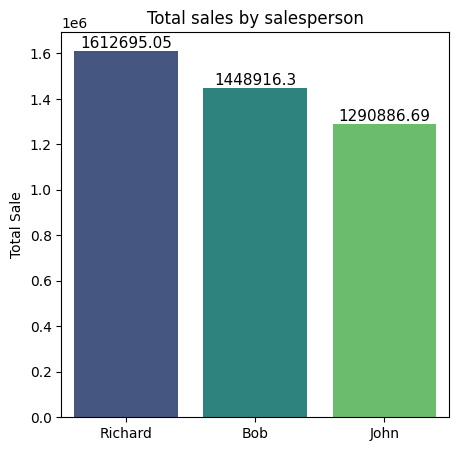

In [14]:
# Total sales by salesperson
sales_person_perform=data.groupby('SalesPerson')['Total Sale'].sum().sort_values(ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(x=sales_person_perform.index,y=sales_person_perform,palette='viridis')
plt.xlabel(None)
for i,v in enumerate(sales_person_perform):
    plt.text(i,v+1,str(v),ha='center',va='bottom',size=11)
plt.title('Total sales by salesperson')
plt.show()

Salesperson Richard has the highest contribution in total sales.

In [15]:
# Bonus recipient, considering total sales and order count.
sales_person_sales=data.groupby('SalesPerson')['Total Sale'].sum().sort_values(ascending=False)
sales_person_qty=data.groupby('SalesPerson')['Order ID'].count().sort_values(ascending=False)
bonus_metric=(((sales_person_sales*0.5)/max(sales_person_sales))+((sales_person_qty*0.5)/max(sales_person_qty))).sort_values(ascending=False)
print(bonus_metric)

SalesPerson
Richard    0.999315
Bob        0.949222
John       0.875569
dtype: float64


Considering equal priority of total sales and order count (50% both), bonus metric is measured using weighted normalization. Here, we can see, Salesperson Richard has the highest bonus metric. So, Richard is the bonus recipient.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10400\759547803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bonus_metric.index,y=bonus_metric,palette='viridis')


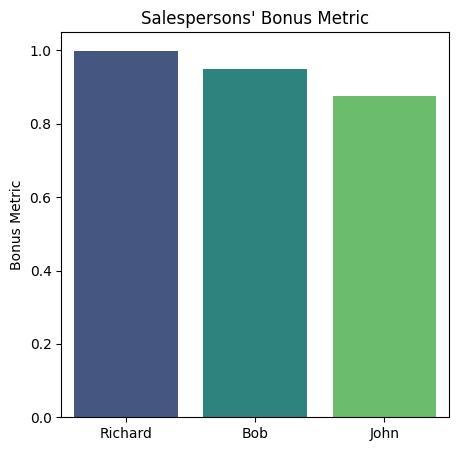

In [16]:
plt.figure(figsize=(5,5))
sns.barplot(x=bonus_metric.index,y=bonus_metric,palette='viridis')
plt.xlabel(None)
plt.ylabel('Bonus Metric')
plt.title("Salespersons' Bonus Metric")
plt.show()

# Task 3: Sales Trend

In [17]:
data[['Unit Sell Price','Total Sale']].describe()

,Unit Sell Price,Total Sale
count,2153.000000,2153.000000
mean,108.115945,2021.596860
std,383.862232,4262.425962
min,1.140000,1.830000
25%,6.480000,141.240000
50%,22.010000,469.800000
75%,100.970000,1979.100000
max,6783.020000,88179.260000


In case of 'Unit Sell Price' and 'Total Sale' there are large difference between mean and median, as well as 25% and 75%.
This could be due to seasonal trend in sales. Here, we will use 'Total Sale' to understand this.

<Axes: ylabel='Total Sale'>

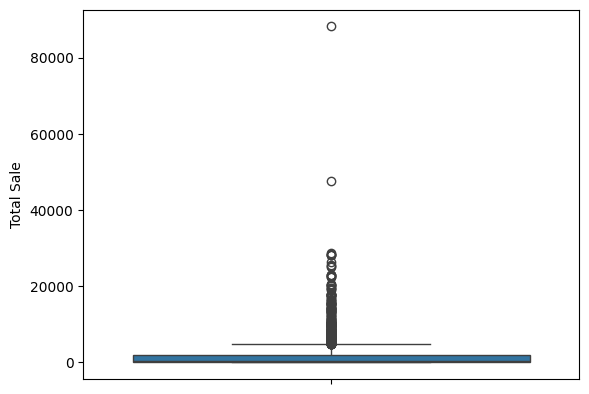

In [18]:
sns.boxplot(data['Total Sale'])

In [19]:
Q1 = data['Total Sale'].quantile(0.25)
Q3 = data['Total Sale'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Is_Outlier'] = (data['Total Sale'] < lower_bound) | (data['Total Sale'] > upper_bound)
data['Is_Outlier'].value_counts()

Is_Outlier
False    1890
True      263
Name: count, dtype: int64

In [20]:
outliers = data[data['Is_Outlier']]
date_outlier=outliers.groupby(outliers['Order Month'])['Is_Outlier'].value_counts()
print(date_outlier)

Order Month  Is_Outlier
April        True          27
August       True          20
December     True          23
February     True          24
January      True          29
July         True          25
June         True          15
March        True          22
May          True          13
November     True          18
October      True          25
September    True          22
Name: count, dtype: int64


The high total sales are distributed all over the year, indicating absence of any clear seasonal trend.

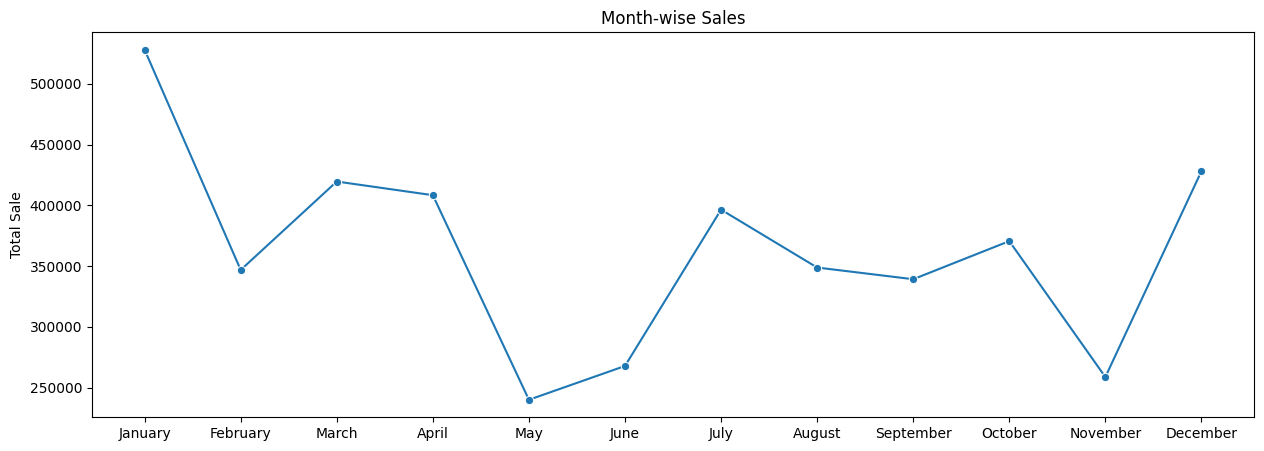

In [21]:
# Monthly total sales
sales_trend=data.groupby(['Month_num','Order Month'])['Total Sale'].sum().reset_index().sort_values('Month_num')
plt.figure(figsize=(15,5))
sns.lineplot(data=sales_trend,x='Order Month',y='Total Sale',marker='o')
plt.xlabel(None)
plt.title('Month-wise Sales')
plt.show()

December and January shows high sales whereas May-June and November shows low sales. For 2015, we can do seasonal advertisement in January and December. We can introduce exclusive offers for May-June and November.

# Task 4: Discount Strategy

Order Priority
Low              0.051381
High             0.050647
Critical         0.048284
Medium           0.048014
Not Specified    0.046157
Name: Discount, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10400\91340525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_priority.index,y=discount_priority,palette='viridis')


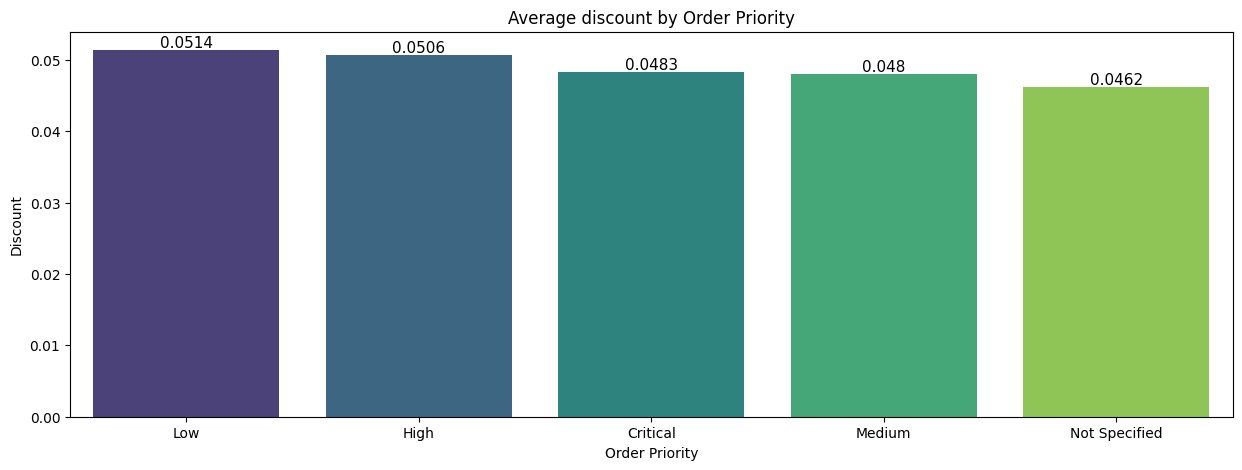

In [22]:
# Average discount by Order Priority
discount_priority=data.groupby('Order Priority')['Discount'].mean().sort_values(ascending=False)
print(discount_priority)
fig=plt.gcf()
fig.set_size_inches(15,5)
sns.barplot(x=discount_priority.index,y=discount_priority,palette='viridis')
for i,v in enumerate(discount_priority):
    plt.text(i,v,str(round(v,4)),ha='center',va='bottom',size=11)
plt.title('Average discount by Order Priority')
plt.show()

There is no big difference in average discounts based on priority. Yet, Low order priority has the highest average discount.

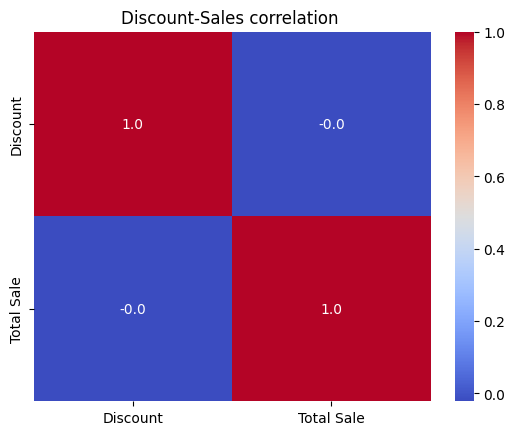

In [23]:
# discount-sales correlation 
column=data[['Discount','Total Sale']]
corr_mat=column.corr()
sns.heatmap(corr_mat,annot=True,fmt='.1f',cmap='coolwarm')
plt.title('Discount-Sales correlation ')
plt.show()

Discounts are not influencing total sales. So, we can reduce discounts.

# Task 5: Shipping Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10400\1590379629.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_shipping.index,y=order_shipping,palette='viridis')


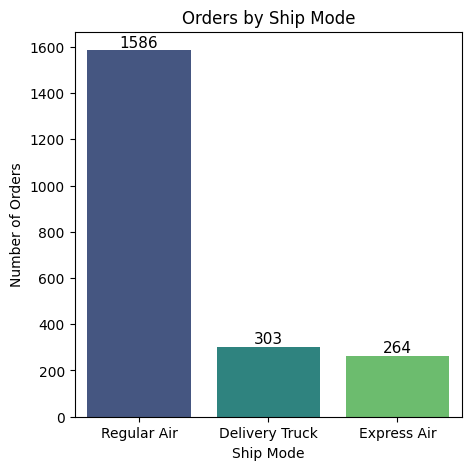

In [24]:
# Orders by Ship Mode
order_shipping=data.groupby('Ship Mode')['Order ID'].count().sort_values(ascending=False)
fig=plt.gcf()
fig.set_size_inches(5,5)
sns.barplot(x=order_shipping.index,y=order_shipping,palette='viridis')
for i,v in enumerate(order_shipping):
    plt.text(i,v,str(v),ha='center',va='bottom',size=11)
plt.xlabel('Ship Mode')
plt.ylabel('Number of Orders')
plt.title('Orders by Ship Mode')
plt.show()

Most of the orders goes by Regular Air.

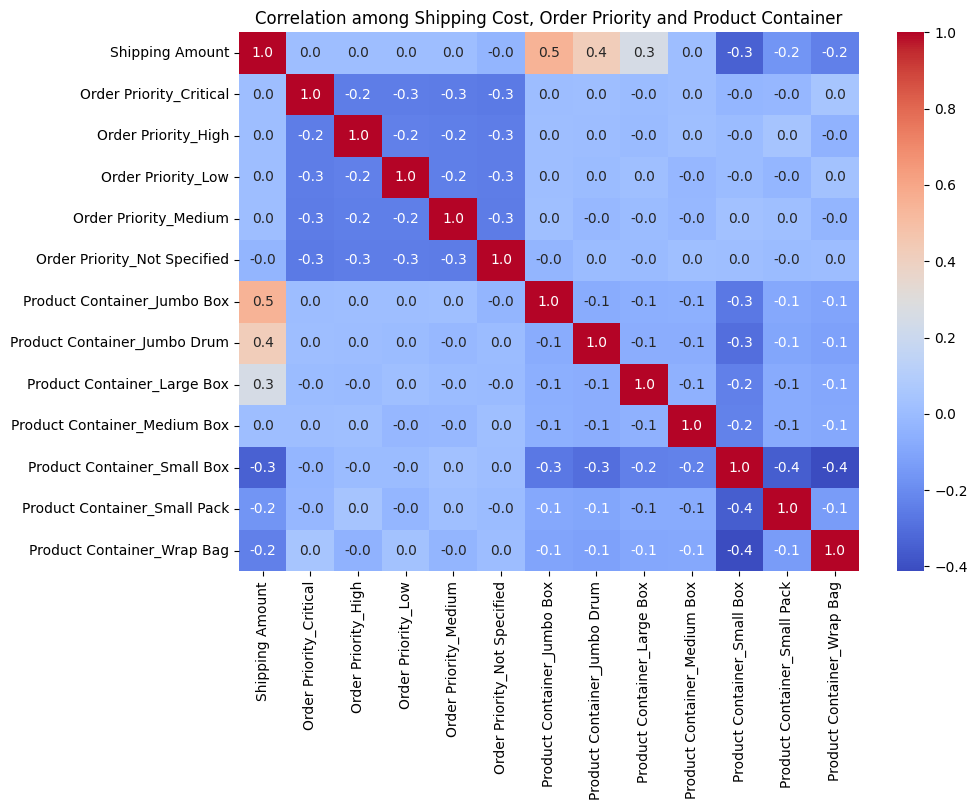

In [25]:
#Recommend one shipping cost reduction strategy.
column=pd.get_dummies(data[['Shipping Amount','Order Priority','Product Container']])
corr_mat=column.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_mat,annot=True,fmt='.1f',cmap='coolwarm')
plt.title('Correlation among Shipping Cost, Order Priority and Product Container')
plt.show()

There is a positive correlation between large product containers (Jumbo Box,Jumbo Drum,Large Box) and shipping amount. That means shipping cost increases when the product container is large. Though the order priority has no impact on shipping amount, High and Critical orders can be sensitive. So, to reduce the shipping cost we can ship the **low order priority large product containers (Jumbo Box,Jumbo Drum,Large Box)** together .

# Task 6: Key Insights and Recommendations

- Salesperson **Richard** has the highest contribution in total sales.
- Salesperson **Richard** has the highest bonus metric. So, Richard is the bonus recipient.
- December and January shows high sales whereas May-June and November shows low sales. For 2015, we can do **seasonal advertisement** in **January** and **December**. We can introduce **exclusive offers** for **May-June** and **November**.
- **Low order priority** has the highest average discount.
- Discounts are not influencing total sales. So, we can **reduce discounts**.
- Most of the orders goes by **Regular Air**.
- To reduce the shipping cost we can ship the **low order priority large product containers (Jumbo Box, Jumbo Drum, Large Box)** together .

### Business Recommendation
Offering discounts in specific season rather than all over the year may have some impact on the total sales. So, we can analyze the discount stratagies and offer limited discounts on specific products on specific time.